
# Assignment No 6c
###### *Sibt ul Hussain*
----
## Goal

Your goal in this assigment is to implement a Perceptron Classifier.

**Note** Please note that you are allowed to use only those libraries which we have discussed in the class, i.e. numpy, scipy, pandas.

## Submission Instructions
You are required to submit the original notebook file on the Slate (with .ipynb extension), with complete set of outputs. Students failing to do so will get zero marks. 

*Please read each step carefully and understand it fully before proceeding with code writing*

## Plagiarism
Any form of plagiarism will not be tolerated and result in 0 marks.

## For Graphical Debugging:
You can use the [pycharm](https://www.jetbrains.com/pycharm/download/#section=linux) excellent graphical debugging based IDE.



### Tasks

1. Complete the missing functions definitions in file "perceptron.py". You will need to write the functions hypothesis, cost_function and derivative_cost_function. **Please read the function definition before proceeding with code writing**.
2. Complete the missing function definition gradient_descent  in file "optimizer.py"
3. Run the complete notebook & check that you are getting the right results from your classifiers.

In [79]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

### Perceptron
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{-1, +1\})$.
Your goal in this assignment is to implement perceptron classifier. Recall that a perceptron uses the hypothesis $\begin{equation} h_\theta(x) = x^T\theta. \end{equation}$ with the classification rule $sign(h_\theta(x))$. 

In perceptron we try to optimize (minimize) following cost function (without regularization):

 $$\begin{equation} J_\theta = \frac{1}{2m}\sum_{i=1}^m  max(0,-y^{(i)} x^{(i) T}\theta)+\frac{\lambda}{2}\sum_{i=1}^k \theta_k^2\end{equation}$$
 
 
Here $m$ is the number of training exmaples.


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 
Recall the partial derivative of the cost function wrt $\theta_j$ for a single example will be =

$$
\frac{\partial J}{\partial \theta_j}= \lambda * \theta_j+ \begin{cases}-y\cdot x_j & \text{if $y\cdot x^T \theta <0$}, \\ 0 &
\text{otherwise}.\end{cases}
$$





In [81]:
from perceptron import * 
from preprocessing import * 

#### Create some dummy data for testing
Please read the code carefully and see whats it is doing...

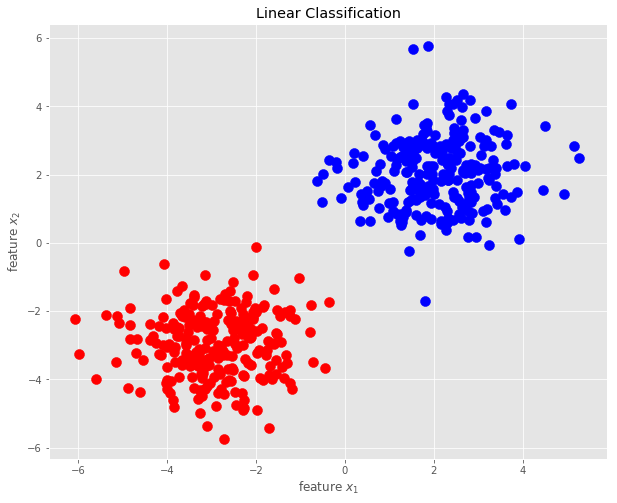

In [82]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=500
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),-1*np.ones((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-percep.svg',format='svg')

In [83]:
print X.shape,Y.shape, max(Y),min(Y)

(500, 2) (500, 1) [ 1.] [-1.]


In [84]:
#Scale the features....
preprocess=PreProcessing(X)
X=preprocess.process_features(X)

In [85]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [86]:
print X.shape,Y.shape

(500, 3) (500, 1)


### Create the Classifier Object

In [87]:
#create a perceptron class object
percep=Perceptron(0)

### Let's Check the Derivatives...

In [88]:
#lets check the derivatives of perceptron, 

#Please note that these derivatives of perceptron can fluctuate, due to kink at zero 
#right way of checking it we after derivative, cost function value must be zero..;
from optimizer import *
Optimizer.gradient_check(X,Y,percep.cost_function,percep.derivative_cost_function)

[[ 0.42913287]
 [-0.25574528]
 [ 0.15750261]] [[ 371.15978755]
 [ 311.39137095]
 [ 118.        ]]
[[ 0.42923287]
 [-0.25574528]
 [ 0.15750261]] diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]]
[[ 0.42913287]
 [-0.25564528]
 [ 0.15750261]] diff in direction [[ 0.    ]
 [ 0.0002]
 [ 0.    ]]
[[ 0.42913287]
 [-0.25574528]
 [ 0.15760261]] diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.0002]]
Computational derivatvie = [0.3715899167871378, 0.3119477123425529, 0.11771010375548341]
Analytical derivative = [ 371.15978755  311.39137095  118.        ]
Relative Error = [ 0.99799968  0.99799843  0.9980069 ]


### Training Time

In [89]:
percep.train(X,Y,Optimizer(alpha=0.01)) # your cost function at the minimum must be zero...

[ 2.17728456] [-2.17020455]


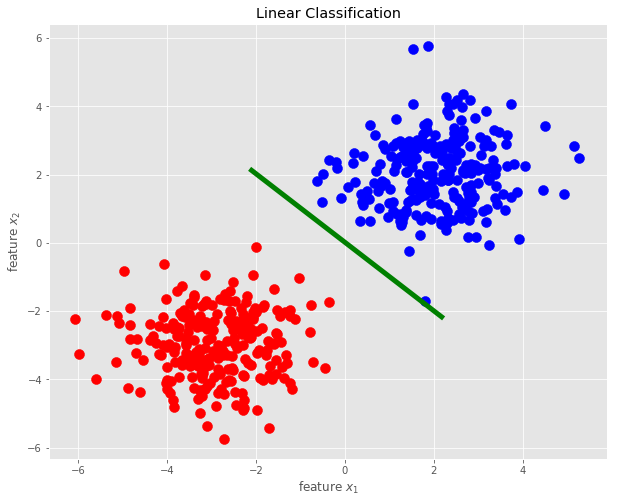

In [90]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-percep.theta[2]-percep.theta[0]*minx)/percep.theta[1]
y2=(-percep.theta[2]-percep.theta[0]*maxx)/percep.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-temp.svg',format='svg')

(10000, 3)


AttributeError: 'module' object has no attribute 'sequeeze'

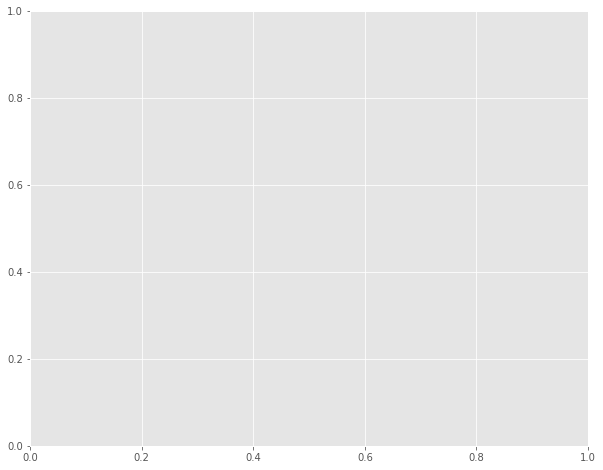

In [91]:
npts=10000
model=percep
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))
print tx.shape
cs= np.sequeeze(model.predict(tx))
print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

### Testing on IRIS dataset

In [92]:
#load the data set
data=pd.read_csv('./iris.data', header=None)
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [93]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape   

 Data Set Dimensions= (150, 4)  True Class labels dimensions (150,)


In [94]:
preprocess=PreProcessing(X)
X=preprocess.process_features(X)

In [95]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [96]:
Y[Y=='Iris-versicolor']=-1
Y[Y=='Iris-setosa']=+1
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [97]:
print X

[[ -9.00681170e-01   1.03205722e+00  -1.34127240e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.14301691e+00  -1.24957601e-01  -1.34127240e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.38535265e+00   3.37848329e-01  -1.39813811e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.50652052e+00   1.06445364e-01  -1.28440670e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.02184904e+00   1.26346019e+00  -1.34127240e+00  -1.31297673e+00
    1.00000000e+00]
 [ -5.37177559e-01   1.95766909e+00  -1.17067529e+00  -1.05003079e+00
    1.00000000e+00]
 [ -1.50652052e+00   8.00654259e-01  -1.34127240e+00  -1.18150376e+00
    1.00000000e+00]
 [ -1.02184904e+00   8.00654259e-01  -1.28440670e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.74885626e+00  -3.56360566e-01  -1.34127240e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.14301691e+00   1.06445364e-01  -1.28440670e+00  -1.44444970e+00
    1.00000000e+00]
 [ -5.37177559e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00
    1.00000000e+00]
 [ -1.2641

In [98]:
percep=Perceptron(lembda=0.00)
feat=[0,1,4]

In [99]:
print Y

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [100]:
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)
Ytrain=Ytrain.reshape(len(Ytrain),1)
Ytest=Ytest.reshape(len(Ytest),1)
print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape   

 Training Data Set Dimensions= (105, 5) Training True Class labels dimensions (105, 1)
 Test Data Set Dimensions= (45, 5) Test True Class labels dimensions (45, 1)


In [101]:
percep.train(Xtrain,Ytrain,Optimizer(alpha=0.0001)) # your cost function at the minimum must be zero...

In [102]:
#Lets test it on the set of unseen examples...
pclasses=percep.predict(Xtest)

In [103]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print pclasses
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])
t.print_confusion_matrix(pclasses.ravel(),Ytest.ravel())

[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]]
44
Accuracy =  0.977777777778


Predicted,-1.0,1.0,All
Actual,,,
-1,29,1,30
1,0,15,15
All,29,16,45


In [104]:
from nose.tools import assert_greater_equal
acc = np.sum(pclasses==Ytest)/float(Ytest.shape[0])
assert_greater_equal(acc, 0.97)